# 데이터 처리

# github.com/slcflab

## Finance-datareader 에서 데이터 받아오기
### https://financedata.github.io/posts/finance-data-reader-users-guide.html

In [2]:
!pip install -U finance-datareader

In [3]:
import FinanceDataReader as fdr
print(fdr.__version__)
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import cvxopt as opt
from cvxopt import solvers
import warnings

0.9.6


In [4]:
# 한국 종목
# KRX, KOSPI, KOSDAQ, KONEX, KONEX

# 미국 종목
# NASDAQ, NYSE, AMEX, SP500

# 각종 지수 및 환율
#각종 지수: KS11(코스피지수), KQ11(코스닥지수), DJI(다우지수), IXIC(나스닥 지수), US500(S&P 5000)
#환율 데이터: USD/KRX (원달러 환율), USD/EUR(달러당 유로화 환율), CNY/KRW: 위엔화 원화 환율


# 암호 화폐
#암호화폐 가격: BTC/USD (비트코인 달러 가격, Bitfinex), BTC/KRW (비트코인 원화 가격, 빗썸)


fdr.StockListing('SP500')

,Symbol,Name,Sector,Industry
0,MMM,3M Company,Industrials,Industrial Conglomerates
1,ABT,Abbott Laboratories,Health Care,Health Care Equipment
2,ABBV,AbbVie Inc.,Health Care,Pharmaceuticals
3,ABMD,ABIOMED Inc,Health Care,Health Care Equipment
4,ACN,Accenture plc,Information Technology,IT Consulting & Other Services
...,...,...,...,...
500,YUM,Yum! Brands Inc,Consumer Discretionary,Restaurants
501,ZBRA,Zebra Technologies,Information Technology,Electronic Equipment & Instruments
502,ZBH,Zimmer Biomet Holdings,Health Care,Health Care Equipment
503,ZION,Zions Bancorp,Financials,Regional Banks


In [5]:
fdr.StockListing('KOSPI')

,Symbol,Market,Name,Sector,Industry,ListingDate,SettleMonth,Representative,HomePage,Region
1,095570,KOSPI,AJ네트웍스,산업용 기계 및 장비 임대업,"렌탈(파렛트, OA장비, 건설장비)",2015-08-21,12월,반채운 윤규선 이현우,http://www.ajnet.co.kr,서울특별시
2,006840,KOSPI,AK홀딩스,기타 금융업,지주사업,1999-08-11,12월,"안재석, 채형석",http://www.aekyunggroup.co.kr,서울특별시
6,027410,KOSPI,BGF,기타 금융업,지주회사,2014-05-19,12월,홍정국,http://www.bgf.co.kr,서울특별시
7,282330,KOSPI,BGF리테일,종합 소매업,체인화 편의점,2017-12-08,12월,이건준,http://www.bgfretail.com,서울특별시
8,138930,KOSPI,BNK금융지주,기타 금융업,금융지주회사,2011-03-30,12월,김지완,http://www.bnkfg.com,부산광역시
...,...,...,...,...,...,...,...,...,...,...
2543,069260,KOSPI,휴켐스,기타 화학제품 제조업,"화합물,화학제품 제조",2002-10-07,12월,신진용,http://www.huchems.com,서울특별시
2547,000540,KOSPI,흥국화재,보험업,손해보험,1974-12-05,12월,권중원,http://www.insurance.co.kr,서울특별시
2548,000547,KOSPI,흥국화재2우B,NaN,NaN,NaT,NaN,NaN,NaN,NaN
2549,000545,KOSPI,흥국화재우,NaN,NaN,NaT,NaN,NaN,NaN,NaN


In [6]:
fdr.DataReader('006840', '2019-01-01', '2019-12-31')

,Open,High,Low,Close,Volume,Change
Date,,,,,,
2019-01-02,53900,54000,51300,51900,23981,-0.038889
2019-01-03,51900,52100,49950,50000,16716,-0.036609
2019-01-04,48950,49950,48900,49300,19437,-0.014000
2019-01-07,50700,50700,49350,50600,12873,0.026369
2019-01-08,51000,51000,49850,50200,11508,-0.007905
...,...,...,...,...,...,...
2019-12-23,33200,33600,32650,33500,17555,0.007519
2019-12-24,33700,34700,33350,34500,29027,0.029851
2019-12-26,34200,35400,34150,34900,38907,0.011594


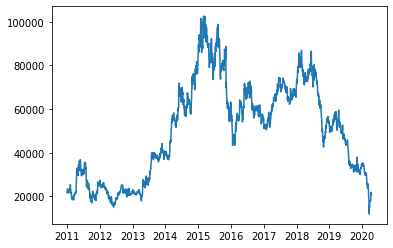

In [8]:
dt = fdr.DataReader('006840', '2011') #2019년~현재
plt.plot(dt['Close'])

In [0]:
# KS11	KOSPI 지수
# KQ11	KOSDAQ 지수
# KS50	KOSPI 50 지수
# KS100	KOSPI 100
# KRX100	KRX 100
# KS200	코스피 200

# DJI	다우존스 지수
# IXIC	나스닥 지수
# US500	S&P 500 지수
# VIX	S&P 500 VIX

# JP225	닛케이 225 선물
# STOXX50E	Euro Stoxx 50
# CSI300	CSI 300 (중국)
# HSI	항셍 (홍콩)
# FTSE	영국 FTSE
# DAX	독일 DAX 30
# CAC	프랑스 CAC 40


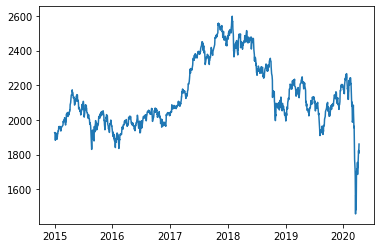

In [0]:
# KS11 (KOSPI 지수), 2015년~현재
df = fdr.DataReader('KS11', '2015')
plt.plot(df['Close'])

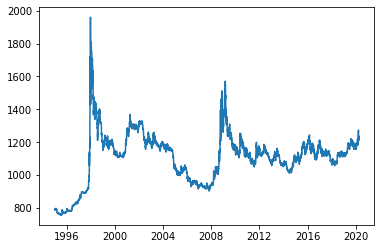

In [0]:
# 원달러 환율, 1995년~현재
df = fdr.DataReader('USD/KRW', '1995')
plt.plot(df['Close'])

## 데이터 전처리 하기

In [0]:
dt = fdr.StockListing('SP500')

In [10]:
a = {}

for name in dt['Symbol'][:20]:
    print(name)
    try:
        a[name] = fdr.DataReader(name, '2019-01-01', '2019-12-31')['Close']
    except:
        print('except')
        pass

MMM
ABT
ABBV
ABMD
ACN
ATVI
ADBE
AMD
AAP
AES
AFL
A
APD
AKAM
ALK
ALB
ARE
ALXN
ALGN
ALLE


In [13]:
a['MMM']

Date
2019-01-02    190.95
2019-01-03    183.76
2019-01-04    191.32
2019-01-07    190.88
2019-01-08    191.68
               ...  
2019-12-24    176.68
2019-12-26    176.59
2019-12-27    177.26
2019-12-30    175.83
2019-12-31    176.42
Name: Close, Length: 252, dtype: float64

In [0]:
k = pd.DataFrame(a)

In [15]:
k.shape

(252, 20)

In [0]:
k

,MMM,ABT,ABBV,ABMD,ACN,ATVI,ADBE,AMD,AAP,AES,AFL,A,APD,AKAM,ALK,ALB,ARE,ALXN,ALGN,ALLE
Date,,,,,,,,,,,,,,,,,,,,
2019-01-02,190.95,69.50,89.23,309.96,140.59,47.03,224.57,18.83,157.92,14.18,45.52,65.69,159.59,59.01,61.52,78.11,111.37,98.05,202.12,81.05
2019-01-03,183.76,66.22,86.29,302.29,135.79,45.36,215.70,17.05,162.85,14.17,44.37,63.27,155.31,57.70,58.12,72.69,112.29,100.21,184.78,79.68
2019-01-04,191.32,68.11,89.07,313.44,141.07,47.17,226.19,19.00,158.81,14.64,44.92,65.46,161.61,59.38,60.00,76.24,113.44,106.00,186.71,79.50
2019-01-07,190.88,69.13,90.37,314.80,141.56,48.50,229.26,20.57,161.14,14.71,45.16,66.85,159.93,61.24,60.12,76.58,114.14,107.94,189.92,80.33
2019-01-08,191.68,68.30,90.79,318.42,145.14,49.97,232.68,20.75,160.02,15.05,45.30,67.83,158.09,62.45,60.65,77.33,116.79,108.61,192.95,81.44
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2019-12-24,176.68,87.28,89.85,172.30,211.61,58.81,329.64,46.54,160.57,19.76,52.76,85.30,235.05,85.73,69.09,72.32,160.10,110.28,277.89,123.87
2019-12-26,176.59,87.28,89.83,171.01,212.05,58.89,331.20,46.63,159.27,19.93,52.62,85.45,236.08,86.34,69.07,72.49,160.03,108.93,278.26,124.64
2019-12-27,177.26,87.40,89.20,169.27,212.22,59.19,330.79,46.18,158.35,19.98,52.62,85.42,235.49,86.50,68.29,72.01,160.40,108.55,277.64,124.59


## Expected Return and Covariance 구하기

In [0]:
data = k
holding_periods=1
returns = data.pct_change(holding_periods).iloc[holding_periods:] # holding period return vector

In [0]:
holding_periods=1
n_term=252 # dailiy return을 annualize
data = k

returns = data.pct_change(holding_periods).iloc[holding_periods:] # holding period return vector


exp_rets = returns.mean() * n_term # average return -- > APR(annual percentage rate)
cov_mat = returns.cov() * n_term # covariance
corr_mat = returns.corr() # corr

## 실습 1)

### 다음의 조건에 해당하는 각 지수별 price data를 pandas의 DataFrame 형태로 생성하시오.
### https://financedata.github.io/posts/finance-data-reader-users-guide.html
### 조건 1: 각 row의 인덱스는 날짜, 각 컬럼은 KOSPI200 지수, S&P500 지수, 나스닥 지수, 닛케이225 선물, USD/KRW로 구성.
### 조건 2: 종가 기준, 기간은 2010년 이후 현재까지.

## 실습 2)

### 위에서 생성된 DataFrame을 활용하여 다음의 데이터를 만드시오.
### a) daily return vector.
### b) (annulaize된) expected return
### c) covariance matrix
### d) correlation matrix

In [0]:
"""
(참고)return 구하는 코드
returns = data.pct_change(holding_periods).iloc[holding_periods:]

(주의) annualize 할때
returns.mean() 에 무엇을 곱해야?
returns.cov() 에 무엇을 곱해야?
"""


'\n(참고)return 구하는 코드\nreturns = data.pct_change(holding_periods).iloc[holding_periods:]\n\n(주의) annualize 할때\nreturns.mean() 에 무엇을 곱해야?\nreturns.cov() 에 무엇을 곱해야?\n'

## 답 1)

In [0]:
symbols = ['KS200', 'US500', 'IXIC', 'JP225', 'USD/KRW']

a = {}
for symbol in symbols:
  a[symbol] = fdr.DataReader(symbol, '2010')['Close']

In [0]:
a = pd.DataFrame(a)

In [62]:
a

,KS200,US500,IXIC,JP225,USD/KRW
Date,,,,,
2010-01-01,NaN,NaN,NaN,NaN,1166.08
2010-01-04,223.49,1132.99,2308.42,10654.79,1150.00
2010-01-05,222.84,1136.52,2308.71,10681.83,1140.20
2010-01-06,224.67,1137.14,2301.09,10731.45,1129.20
2010-01-07,221.31,1141.69,2300.05,10681.66,1138.20
...,...,...,...,...,...
2020-04-08,241.89,2749.98,8090.90,19353.24,1216.26
2020-04-09,245.61,2789.82,8153.58,19345.77,1211.08
2020-04-10,248.00,NaN,NaN,19498.50,1211.55


## 답 2)

In [0]:
holding_periods=1
n_term=252 # dailiy return을 annualize
data = a

returns = data.pct_change(holding_periods).iloc[holding_periods:] # holding period return vector
exp_rets = returns.mean() * n_term # average return -- > APR(annual percentage rate)
cov_mat = returns.cov() * n_term # covariance
corr_mat = returns.corr() # corr

# Efficient frontier 구하기

### https://cvxopt.org/userguide/coneprog.html?highlight=qp#cvxoptsolvers.qp

In [0]:
def mean_var_portfolio(cov_mat, exp_rets, target_ret):
    
        n = len(cov_mat)
        
        # Objective function
        # min (1/2)*w.T*P*w
        P = opt.matrix(cov_mat.values) 
        q = opt.matrix(0.0, (n, 1))
        
        
        # Constraints Gw <= h
        # exp_rets*w >= target_ret and w >= 0
        G = opt.matrix(np.vstack((-exp_rets.values, -np.identity(n))))
        h = opt.matrix(np.vstack((-target_ret, np.zeros((n, 1)))))
        
        # Constraints Aw = b
        # sum(w) = 1
        A = opt.matrix(1.0, (1, n))
        b = opt.matrix(1.0)
        
        # Solve
        solvers.options['show_progress'] = False
        sol = solvers.qp(P, q, G, h, A, b)
        
        # Put weights into a labeled series
        w = pd.Series(sol['x'], index=cov_mat.index)
        
        return w

In [72]:
np.array(exp_rets)

array([0.01111614, 0.10674392, 0.1434616 , 0.11789104, 0.00965765])

In [71]:
np.sqrt(np.diag(cov_mat))

array([0.10861261, 0.08568476, 0.10706528, 0.20212828, 0.05542273])

In [0]:
max_risk=0.5
max_ret = exp_rets.max()
min_ret = exp_rets[exp_rets > 0].min()

n_step = 100
step_diff = (max_ret - min_ret)/n_step

risks = []
rets = []

for step in range(n_step):
    target_ret = min_ret + (step * step_diff) # y축을 아래부터 시작해서 위로 조금씩 올려가면서
    _w = mean_var_portfolio(cov_mat, exp_rets, target_ret) # 최적화를 돌려서 나온 _w임.
    risk = np.sqrt(np.dot(np.dot(_w, cov_mat), _w))
    
    if risk > max_risk:
        break
    
    risks.append(risk)
    ret = np.dot(exp_rets, _w)
    rets.append(ret)

In [0]:
min_ret

0.031053811876271084

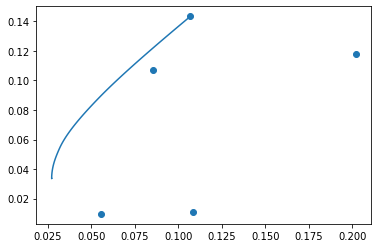

In [77]:
plt.plot(risks, rets)


var = np.diag(cov_mat)
plt.scatter(np.sqrt(var), exp_rets)

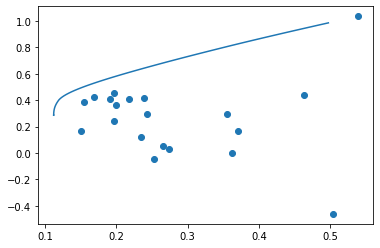

In [0]:
plt.plot(risks, rets)
var = np.diag(cov_mat)
plt.scatter(np.sqrt(var), exp_rets)

## 실습 3)

### 위 실습 1,2에서 구한 expected return과 covriance를 바탕으로 아래의 코드의 빈칸을 채워 Efficient frontier를 그려보시오

In [0]:
# 아래의 최적화 코드 활용하기

def mean_var_portfolio(cov_mat, exp_rets, target_ret):
        n = len(cov_mat)

        P = opt.matrix(cov_mat.values) 
        q = opt.matrix(0.0, (n, 1))
        
        
        G = opt.matrix(np.vstack((-exp_rets.values, -np.identity(n))))
        h = opt.matrix(np.vstack((-target_ret, np.zeros((n, 1)))))
        
        A = opt.matrix(1.0, (1, n))
        b = opt.matrix(1.0)
        
        solvers.options['show_progress'] = False
        sol = solvers.qp(P, q, G, h, A, b)
        
        w = pd.Series(sol['x'], index=cov_mat.index)
        
        return w

In [0]:
max_risk=0.5
max_ret = ??
min_ret = ??

n_step = 1000
step_diff = (max_ret - min_ret)/n_step

risks = []
rets = []

for step in range(n_step):
    target_ret = min_ret + (step * step_diff) # y축을 아래부터 시작해서 위로 조금씩 올려가면서
    _w = ?? # 최적화를 돌려서 나온 _w임.
    risk = ??

    if risk > max_risk:
        break
    
    risks.append(risk)
    ret = ??
    rets.append(ret)

## 답 3)

In [0]:
max_risk=0.5
max_ret = exp_rets.max()
min_ret = exp_rets[exp_rets > 0].min()

n_step = 1000
step_diff = (max_ret - min_ret)/n_step

risks = []
rets = []

for step in range(n_step):
    target_ret = min_ret + (step * step_diff) # y축을 아래부터 시작해서 위로 조금씩 올려가면서
    _w = mean_var_portfolio(cov_mat, exp_rets, target_ret) # 최적화를 돌려서 나온 _w임.
    risk = np.sqrt(np.dot(np.dot(_w, cov_mat), _w))

    if risk > max_risk:
        break
    
    risks.append(risk)
    ret = np.dot(exp_rets, _w)
    rets.append(ret)

In [0]:
plt.plot(risks, rets)